In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [4]:
# Numerical Binning Example
revenue_df = pd.read_excel('./binning/201_Revenue_Total.xlsx')
revenue_df

,reference number,name,price,date
0,740150,Thomas LLC,3380.91,2018-01-01 07:21:51
1,714466,Sillians-Krapfs,-63.16,2018-01-01 10:00:47
2,218895,Snodgrass Inc,2086.10,2018-01-01 13:24:58
3,307599,"Craut, Oniote and Johnson",863.05,2018-01-01 15:05:22
4,412290,Judais-Pewrters,499.26,2018-01-01 23:26:55
...,...,...,...,...
1502,424914,Green-Brown,1582.49,2018-11-27 14:29:02
1503,424914,Green-Brown,1049.28,2018-12-19 15:15:41
1504,424914,Green-Brown,2166.75,2018-12-29 13:03:54
1505,424914,Green-Brown,1915.00,2018-12-22 03:31:36


<Axes: ylabel='Frequency'>

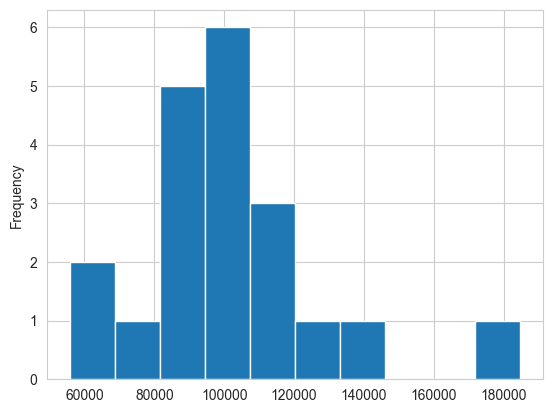

In [5]:
# Bin continuous data by using a simple histogram

sns.set_style('whitegrid')
df = revenue_df.groupby(['reference number', 'name'])['price'].sum().reset_index()
df['price'].plot(kind='hist')

In [6]:
# Quantile Binning Example

df['price'].describe()



count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: price, dtype: float64

In [7]:
df['quantile_price_quartiles'] = pd.qcut(df['price'], q=4)
df['quantile_price_deciles'] = pd.qcut(df['price'], q=10, precision=0)
bin_labels_5 = ['Rookie', 'Sophomore', 'Junior', 'Senior', 'Professional']

df['quantile_price_quintiles'] = pd.qcut(df['price'], 
                                         q=[0, .2, .4, .6, .8, 1], 
                                         labels=bin_labels_5)
df.head()

,reference number,name,price,quantile_price_quartiles,quantile_price_deciles,quantile_price_quintiles
0,141962,Speilmans LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Rookie
1,146832,Jones-Spank,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Junior
2,163416,Muns-Kalifan,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Rookie
3,218895,Snodgrass Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Professional
4,239344,Finley LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Sophomore


In [8]:
# Check the bin ranges 

results, bin_edges = pd.qcut(df['price'], 
                             q = [0, .2, .4, .6, .8, 1],
                             labels=bin_labels_5,
                             retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5), 
                             columns=['Threshold', 'Tier'])

results_table
  


,Threshold,Tier
0,55733.050,Rookie
1,87167.958,Sophomore
2,95908.156,Junior
3,103605.970,Senior
4,112290.054,Professional


In [ ]:
# Check the bin distribution

df['quantile_price_quintiles'].value_counts()

quantile_price_quintiles
Rookie          4
Sophomore       4
Junior          4
Senior          4
Professional    4
Name: count, dtype: int64

In [ ]:
# Use cut to define the bin edges

df = df.drop(columns=['quantile_price_quartiles', 'quantile_price_deciles', 'quantile_price_quintiles'])

# Bins are equal size, but the data is unevenly distributed
pd.cut(df['price'], bins=4)

pd.cut(df['price'], bins=4).value_counts()

price
(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: count, dtype: int64